In [36]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Nomor 1: Model Klasifikasi SVM

In [37]:
data_frame = pd.read_csv('csv/voice.csv')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

      female       0.98      0.89      0.93       297
        male       0.91      0.99      0.95       337

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634


Text(97.72222222222221, 0.5, 'Truth')

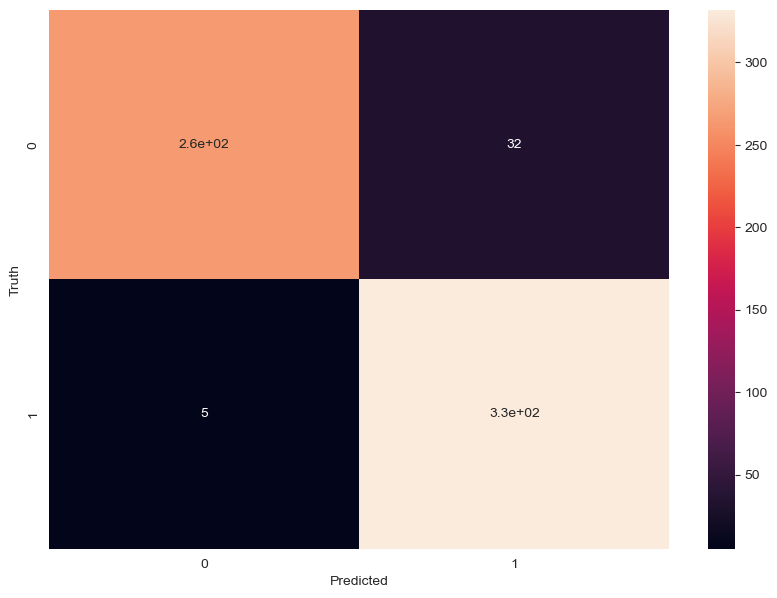

In [38]:
x = data_frame[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'maxfun', 'minfun', 'mindom', 'maxdom', 'dfrange', 'modindx']]
y = data_frame[['label']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#menggunakan SVM library untuk membuat SVM classifier
classifier = svm.SVC(kernel = 'linear')

#memasukkan training data kedalam classifier
classifier.fit(x_train, y_train)

#memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(x_test)

#menampilkan classification report
print(classification_report(y_test, y_predict))

#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, y_predict)

plt.figure (figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Nomor 2: Model klasfikasi Multinomial Naive Bayes 

In [39]:
# Baca data dari file CSV
data = pd.read_csv('csv/spam.csv', encoding='latin-1')

# Pisahkan kolom teks (v2) dan label (v1)
X = data["v2"]
y = data["v1"]

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi CountVectorizer dengan mengaktifkan stop_words
vectorizer = CountVectorizer(stop_words='english')

# Transformasi teks menjadi representasi vektor
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Membuat model Multinomial Naive Bayes
clf = MultinomialNB()

# Melatih model pada data pelatihan
clf.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Multinomial Naive Bayes: {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Menampilkan matriks konfusi
confusion = confusion_matrix(y_test, y_pred)
print("Matriks Konfusi:")
print(confusion)


Akurasi Model Multinomial Naive Bayes: 0.98
Laporan Klasifikasi:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Matriks Konfusi:
[[959   6]
 [ 12 138]]


### Nomor 3: Model klasfikasi Multinomial Naive Bayes 

In [40]:
# Baca data dari file CSV
data = pd.read_csv('csv/spam.csv', encoding='latin-1')

# Pisahkan kolom teks (v2) dan label (v1)
X = data["v2"]
y = data["v1"]

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi TfidfVectorizer dengan mengaktifkan stop_words
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

# Transformasi teks menjadi representasi vektor TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Membuat model Multinomial Naive Bayes
clf_tfidf = MultinomialNB()

# Melatih model pada data pelatihan TF-IDF
clf_tfidf.fit(X_train_tfidf, y_train)

# Melakukan prediksi pada data pengujian TF-IDF
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

# Evaluasi model menggunakan TF-IDF
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Akurasi Model Multinomial Naive Bayes dengan TF-IDF: {accuracy_tfidf:.2f}")

# Menampilkan laporan klasifikasi menggunakan TF-IDF
print("Laporan Klasifikasi dengan TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))

# Menampilkan matriks konfusi menggunakan TF-IDF
confusion_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print("Matriks Konfusi dengan TF-IDF:")
print(confusion_tfidf)

Akurasi Model Multinomial Naive Bayes dengan TF-IDF: 0.97
Laporan Klasifikasi dengan TF-IDF:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Matriks Konfusi dengan TF-IDF:
[[965   0]
 [ 37 113]]
